In [ ]:
CREDIT CARD FRAUD DETECTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0.0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
221,145,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0.0
223,145,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,...,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0.0
1178,919,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,...,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0.0
1180,919,1.207596,-0.036860,0.572104,0.373148,-0.709633,-0.713698,-0.181105,0.011277,0.283940,...,-0.194591,-0.514717,0.089714,0.543768,0.240581,0.418921,-0.051693,-0.000085,1.00,0.0
1382,1074,-2.248488,-0.195670,0.026949,-0.525780,-0.238759,-0.033359,0.162196,0.928520,-0.424215,...,-0.032208,-0.745757,-0.243193,-0.821633,-0.030402,0.335838,-0.286998,-0.243768,158.00,0.0


<Axes: xlabel='Time', ylabel='Amount'>

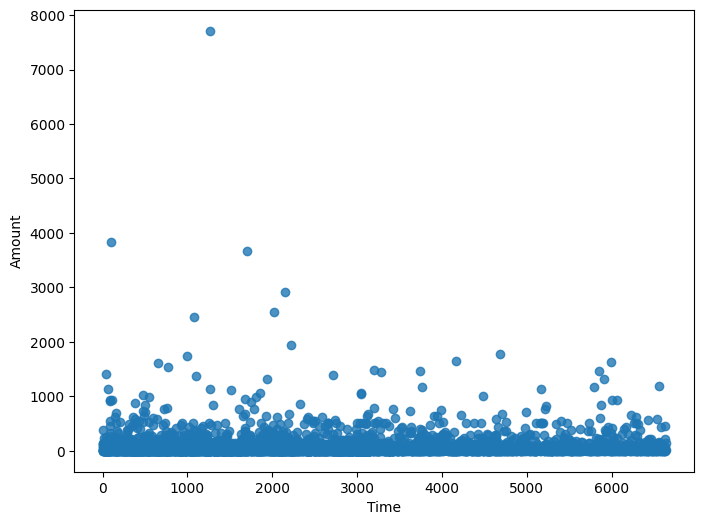

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Time',y='Amount',data=df)

<Axes: xlabel='Amount', ylabel='Count'>

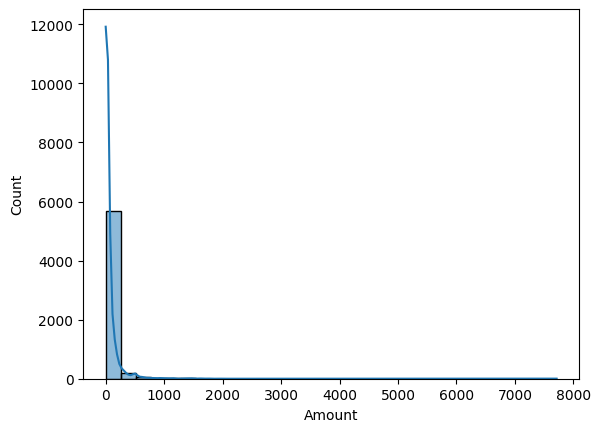

In [ ]:
sns.histplot(df['Amount'],bins=30, kde=True)

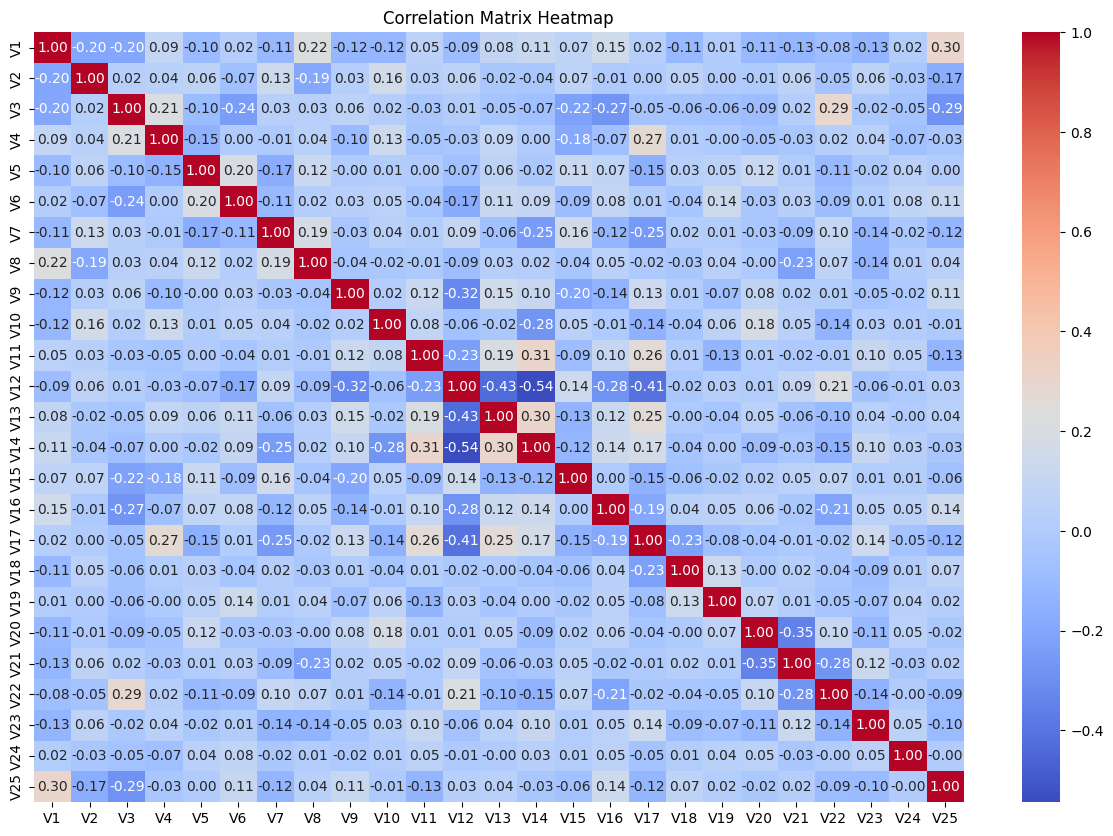

In [ ]:
columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
           "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19",
           "V20", "V21", "V22", "V23", "V24", "V25"]

cor_mat = df[columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()